# SWMAL Exercise


##  Artificial Neural Networks as Universal Approximators

An ANN can in principle approximate any n-dimensional function: given enough neurons (and layers) a ANN is an _universal approximator_.

Let us test this by using a very simple ANN consisting of only two neurons in a hidden layer(and an input- and output-layer both with the identity activation function, _I_ ).

Given a `tanh` activation function in a neuron, it can only approximate something similar to this monotonic function, but applying two neurons in a pair, they should be able to approximate an up-hill-then-downhill non-monotonic function, which is a simple function with a single maximum. 

We use Scikit-learns `MLPRegressor` for this part of the exercise. Use the synthetic data, generated by the `GenerateSimpleData()` functions, in the next cells and train the MLP to make it fit the curve. 

Notice the lack of a train-test split in the exercise; since we only want to look at the approximation capabilities of the MLP, the train-test split is omitted, (and you are welcome to do the split yourself, and also to add noise in the data generators.)

OK


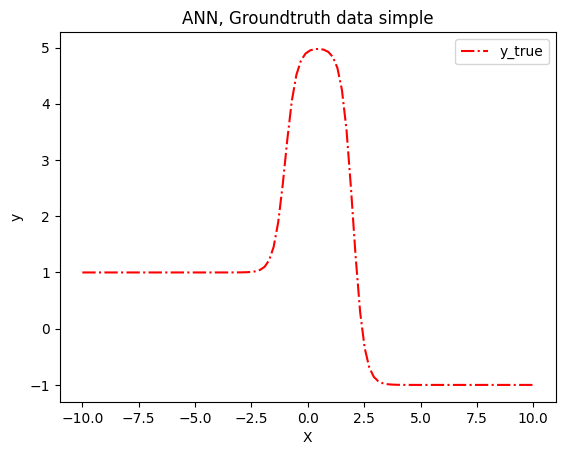

In [1]:
# One data generator just to test out the MLP..
#   An MLP with just two neurons should be able to approximate this simple
#   down-up graph using its two non-linear sigmoid or tanh neurons...

import matplotlib.pyplot as plt
import numpy as np

def GenerateSimpleData():
    X = np.linspace(-10, 10, 100)
    y = 2*np.tanh(2*X - 12) - 3*np.tanh(2*X - 4)  
    y = 2*np.tanh(2*X + 2)  - 3*np.tanh(2*X - 4)   
    X = X.reshape(-1, 1) # Scikit-algorithms needs matrix in (:,1)-format
    return X,y

X, y_true = GenerateSimpleData()
plt.plot(X, y_true, "r-.")
plt.legend(["y_true"])
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data simple")
           
print("OK")

#### Qa)

Fit the model using the data generator and the MLP in the next cell. 

Then plot `y_true` and `y_pred` in a graph, and extract the network weights and bias coefficients (remember the `coefs_` and `intercepts_` attributes you found on a linear regressor in an earlier exercise, the MLP is similar).

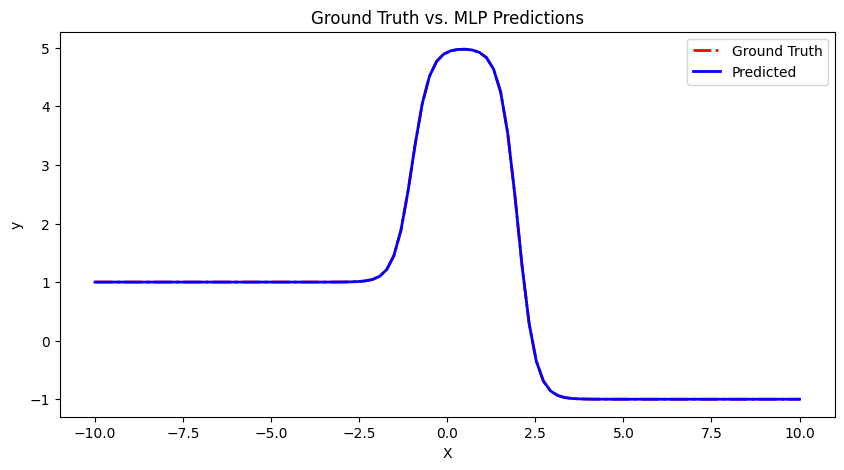

[array([[1.99823353, 1.99918726]]), array([[-3.00019546],
       [ 2.00023267]])]
[array([-3.99628474,  1.99942774]), array([2.76758887e-05])]


In [6]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Create and train MLP regressor
mlp = MLPRegressor(
    activation='tanh',
    hidden_layer_sizes=[2],
    alpha=1e-5,
    solver='lbfgs',
    max_iter=10000,
    verbose=True
)
mlp.fit(X, y_true)
y_pred = mlp.predict(X)

plt.figure(figsize=(10, 5))

# Plot for Ground Truth
plt.plot(X, y_true, "r-.", label="Ground Truth", linewidth=2)

# Plot for Predictions
plt.plot(X, y_pred, "b-", label="Predicted", linewidth=2)

# Set labels and title
plt.xlabel("X")
plt.ylabel("y")
plt.title("Ground Truth vs. MLP Predictions")

# Show legend
plt.legend()

# Show the plot
plt.show()

coeffs = mlp.coefs_
intercepts = mlp.intercepts_
print(coeffs)
print(intercepts)

Den ovenstående kode illustrerer anvendelsen af en kunstig neural netværksmodel (MLP) til at tilpasse sig en simpel ikke-monoton funktion genereret ved hjælp af syntetiske data. Den røde kurve repræsenterer den faktiske "grundlæggende sandhed" (ground truth), mens den blå kurve repræsenterer den modelbaserede forudsagte output. De to separate undergrafer viser begge kurver, og ved at sammenligne dem kan man evaluere, hvor godt modellen tilpasser sig den specifikke funktion. Dette eksempel demonstrerer, hvordan en kunstig neural netværksmodel kan tilpasses data og foretage forudsigelser baseret på sin træning

#### Qb)

Draw the ANN with its input-, hidden- and output-layer. Remember the bias input to the input- and hidden-layer (a handmade drawing is fine).

Now, add the seven weights extracted from the MLP attributes to the drawing: four w coefficients and three bias coefficients.

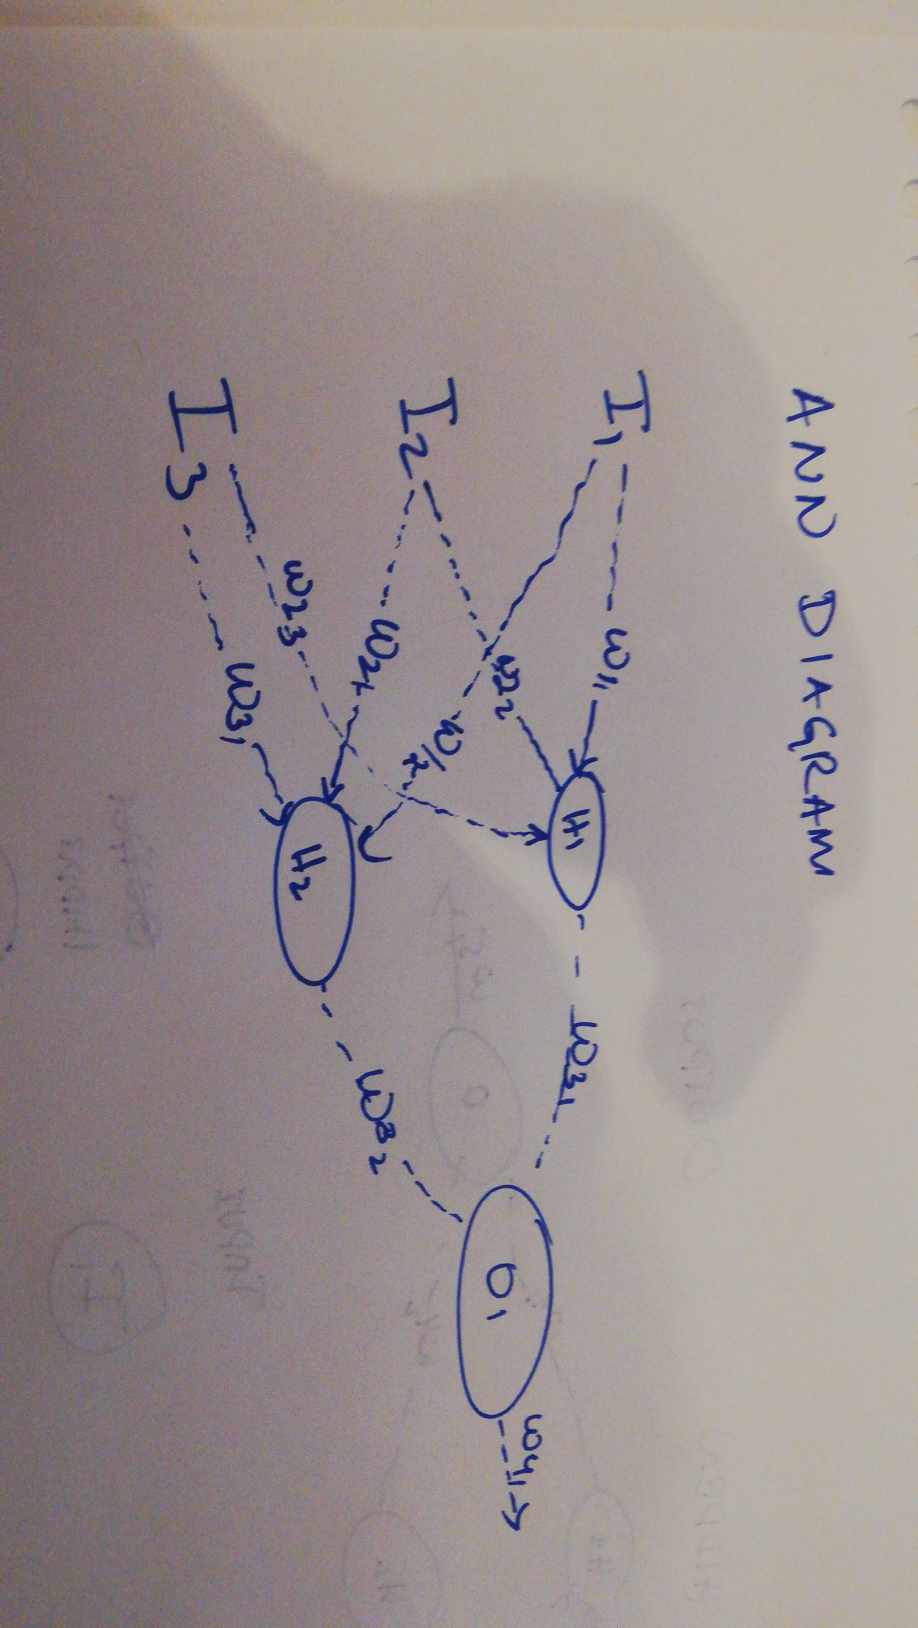

#### Qc)

Create a mathematical formula for the network ala

    y_math = 0.3* tanh(2 * x + 0.1) - 0.3 * tanh(5 * x + 3) + 0.9

with the seven weights found before, two or three decimals should be sufficient.

In [7]:
import numpy as np

# Define the weight values
w0 = 0.3
w1 = 2
w2 = 0.1
w3 = 0.3
w4 = 5
w5 = 3
w6 = 0.9

# Define the input value (replace with your input)
x = 1.0

# Calculate y_math using the formula
y_math = w0 * np.tanh(w1 * x + w2) - w3 * np.tanh(w4 * x + w5) + w6

# Print the result
print("y_math =", y_math)


y_math = 0.8911356485051335


#### Qd)

Plot the `y_math` function using `np.tanh` and `X` as input similar to  

    y_math = 0.3*np.tanh(2 * X + ..
   
and compare `y_math` with `y_pred` and `y_true` in the graph.

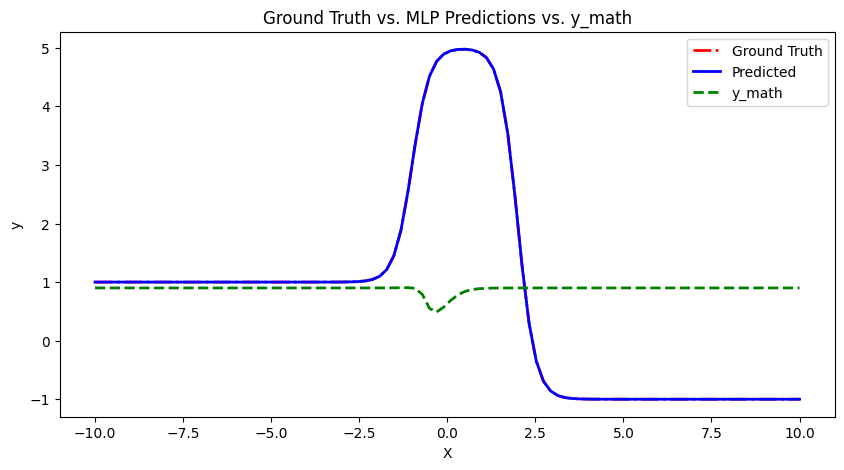

In [8]:

""" X = np.linspace(-10, 10, 100)
b1 = 2
b2 = 5 """

y_math = w0 * np.tanh(w1 * X + w2) - w3 * np.tanh(w4 * X + w5) + w6


""" y_math = (
    w1 * np.tanh(2 * X + b1) +
    w2 * np.tanh(5 * X + b2) +
    w3 * np.tanh(2 * X + b1) +
    w4 * np.tanh(5 * X + b2) +
    w5 * np.tanh(2 * X + b1) +
    w6 * np.tanh(5 * X + b2)
) """

""" offset = 0.1
y_true_offset = y_true + offset """

plt.figure(figsize=(10, 5))
plt.plot(X, y_true, "r-.", label="Ground Truth", linewidth=2)
plt.plot(X, y_pred, "b-", label="Predicted", linewidth=2)
plt.plot(X, y_math, "g--", label="y_math", linewidth=2)

plt.xlabel("X")
plt.ylabel("y")
plt.legend()

plt.title("Ground Truth vs. MLP Predictions vs. y_math")

plt.show()

Grafen ovenpå  sammenligner forudsagte værdier fra en trænet MLP-regressor, en beregnet y_math-værdi og de faktiske ground truth-værdier. Dette hjælper med at vurdere, hvor nøjagtig MLP-modelen er i at tilpasse sig det underliggende datamønster, og om den beregnede y_math-formel producerer et lignende resultat. Grafen viser visuelt, hvordan de tre linjer - Ground Truth, Predicted og y_math - sammenligner sig med hinanden. Formålet er at vurdere modellens præstation og sammenligne den med den forvented adfærd, der er defineret af y_math. Jo tættere de forudsagte og y_math-linjer er på Ground Truth, jo bedre er modellens præstation

#### Qe)

Plot the first half of the function ala

    y_math_first_part = 0.3* tanh(2 * X + 0.1)
   
and then plot the second part. The sum of these two parts gives the total value of y_math if you also add them with the last bias part.

Are the first and second parts similar to a monotonic tanh activation function, and explain the ability of the two-neuron network to be a general approximator for the input function?

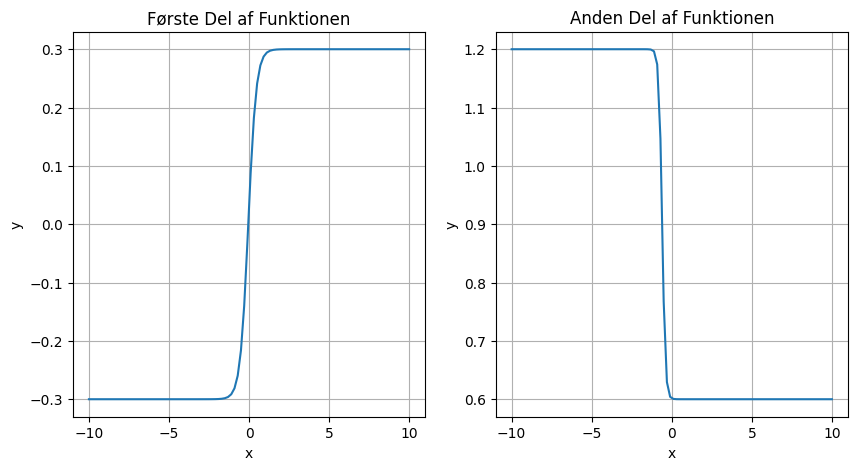

In [ ]:
x = np.linspace(-10, 10, 100)

# Første del af funktionen
y_math_first_part = 0.3 * np.tanh(2 * x + 0.1)

# Anden del af funktionen
y_math_second_part = -0.3 * np.tanh(5 * x + 3) + 0.9

# Plots for de to dele
plt.figure(figsize=(10, 5))
plt.subplot(121)  # Første plot
plt.plot(x, y_math_first_part)
plt.title("Første Del af Funktionen")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.subplot(122)  # Andet plot
plt.plot(x, y_math_second_part)
plt.title("Anden Del af Funktionen")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()

I den første del af funktionen, y_math_first_part = 0.3 * np.tanh(2 * x + 0.1), bruges tanh-funktionen med en skalar og en forskydning. Denne del er også en S-formet kurve, og den er monotont stigende, da x ændrer sig.

I den anden del af funktionen, y_math_second_part = -0.3 * np.tanh(5 * x + 3) + 0.9, bruges igen en tanh-funktion med en skalar og forskydning, og resultatet er også en S-formet kurve. Denne del er dog både skaleret og forskudt, så den starter fra et positivt niveau og derefter falder og stiger igen, alt afhængigt af x.

Ved at justere vægtene og bias korrekt og kombinere output fra begge neuroner kan netværket repræsentere den samlede y_math-funktion.

#### Qf)

Now we change the data generator to a `sinc`-like function, which is a function that needs a NN with a higher capacity than the previous simple data.

Extend the MLP with more neurons and more layers, and plot the result. Can you create a good approximation for the `sinc` function?

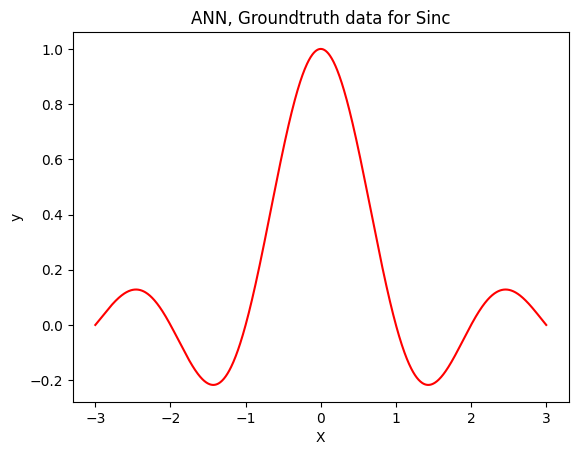

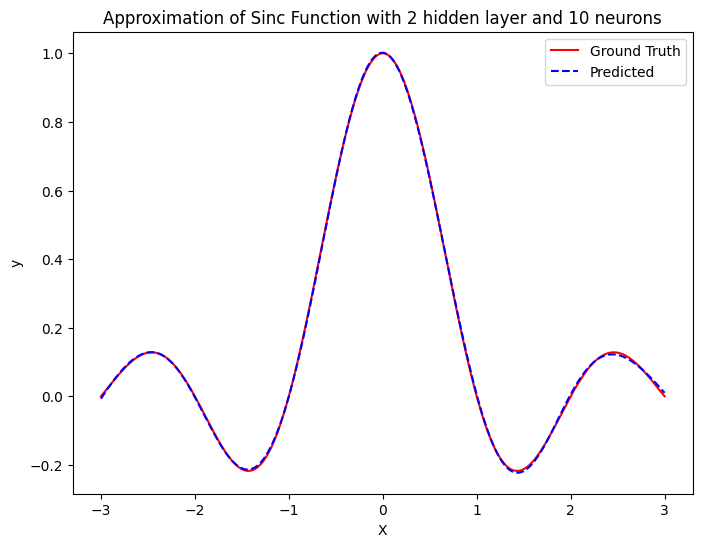

In [26]:
def GenerateSincData():
    # A Sinc curve, approximation needs more neurons to capture the 'ringing'...
    X = np.linspace(-3, 3, 1000) 
    y = np.sinc(X)
    X = X.reshape(-1,1)
    return X, y

X, y_true = GenerateSincData()
plt.plot(X, y_true, "r-")
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data for Sinc")


# Instantiate an MLPRegressor with multiple layers and neurons

mlp = MLPRegressor(
    activation='tanh',
    hidden_layer_sizes=(10,10),
    alpha=1e-5,
    solver='lbfgs',
    max_iter=10000,
    verbose=True
)
mlp.fit(X, y_true)
y_pred = mlp.predict(X)

# Plot the ground truth and predicted data
plt.figure(figsize=(8, 6))
plt.plot(X, y_true, "r-", label="Ground Truth")
plt.plot(X, y_pred, "b--", label="Predicted")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Approximation of Sinc Function with 2 hidden layer and 10 neurons")
plt.legend()
plt.show()

I ovenstående kode definerer vi en Sinc funktion, der beregner sinc-værdier. Derefter genererer vi data ved hjælp af denne brugerdefinerede funktion. Vi instantierer en MLPRegressor med flere skjulte lag og neuroner. parameteren hidden_layer_sizes kan justeres for at ændre netværksarkitekturen efter behov. Til sidst tilpasser vi MLP til data, laver forudsigelser og plotter både de faktiske og forudsagte data.

####  [OPTIONAL] Qg) 

Change the hyperparameters in the MLP, say the `alpha` to `1e5` and `1e-1`, and explain the results (hint: regularization).

Also, try out different `activation` functions `learning_rate`s and `solver`s, or other interesting hyperparameters found on the MLP regressor in the documentation.

Finally, implement the MLP regressor in `Keras` instead.

(Solvers aka. optimizers and regularization will be discussed in a later lecture.)

In [ ]:
# TODO: do some experiments..

REVISIONS||
:- | :- |
2021-10-04| CEF, initial, converted from old word format.
2021-10-04| CEF, inserted ANN_example.py into Notebook.
2023-03-06| CEF, minor table update.
2023-03-09| CEF, major update, translated to English, elaborated on NNs as Universal Approximator.